In [1]:
import pandas as pd
import numpy as np

#### Reads in the Deal Table Query output, specifies dates in the closed won column

#### Query used for Output:
- select distinct deal_id,closed_won_date,deal_value_usd
    from deal 
    where deal_value_usd is not null;

In [2]:
df = pd.read_csv('query_output.csv',parse_dates=['closed_won_date'])

In [3]:
# Limiting to projects with deals with $ values
df = df[~df['deal_value_usd'].isnull()]

In [4]:
# Total Number of valid projects
df.shape

(842, 3)

In [5]:
# Checking date range
print('First project start date',df['closed_won_date'].min())
print('Last project start date',df['closed_won_date'].max())

First project start date 2018-06-01 00:00:00
Last project start date 2021-07-13 00:00:00


In [6]:
# Defining month and pct revenue lists
months = [0,3,6]
rev = [0.2,0.4,0.4]

In [7]:
# The loop below creates 3 dataframes for each point in revenue for each deal using the above lists
# Appends all into the df_full object
df_full = pd.DataFrame()
for i in range(0,3):
    df_tmp = pd.DataFrame({'deal_id':df['deal_id']
                          ,'date':df['closed_won_date']+pd.DateOffset(months=months[i])
                          ,'rev':df['deal_value_usd']*rev[i]})
    df_full = df_full.append(df_tmp,ignore_index=True)
    df_full = df_full.sort_values(by=['date'])

In [8]:
# Quick check to verify every distinct deal id appears three times in the total set
len(df_full['deal_id'])/len(df_full['deal_id'].unique()) == 3

True

In [9]:
# Groupby Aggregation for Year-Month totals
ts = pd.DataFrame(df_full.groupby(df_full.date.dt.to_period('M'))['rev'].sum())

In [10]:
# Year - Month with highest revenue
print(ts['rev'].idxmax(),'$',ts['rev'].max())

2021-06 $ 1526444.0


<AxesSubplot:xlabel='date'>

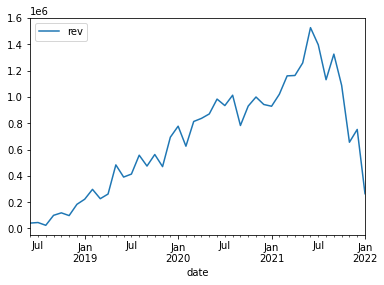

In [11]:
ts.plot()

In [12]:
ts

,rev
date,
2018-06,40854.6
2018-07,45086.4
2018-08,23822.4
2018-09,99715.4
2018-10,118600.4
2018-11,97824.4
2018-12,183340.6
2019-01,222195.4
2019-02,297169.4
